<a href="https://colab.research.google.com/github/afrincon/redes-neuronales-uao/blob/main/NNDL_Autoencoders_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download libraries
!pip install mglearn

In [2]:
# Import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import mglearn

from tensorflow.keras.models import Model

from tensorflow.keras.utils import plot_model

In [3]:
# Testing if GPU is enabled
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = tf.keras.Input(shape=(784,),name='Entrada')
# "encoded" is the encoded representation of the input
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = tf.keras.layers.Dense(784, activation='sigmoid', name='Salida')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [5]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [6]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = tf.keras.Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
Salida (Dense)               (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


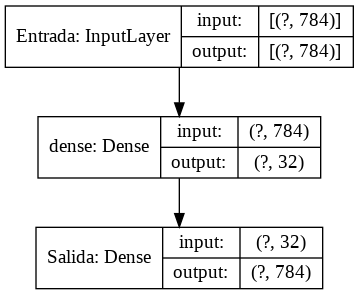

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()
plot_model(autoencoder, to_file='Autoencoder.png', show_shapes=True)

In [8]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/200
235/235 [==============================] - 1s 4ms/step - loss: 0.2796 - val_loss: 0.1913
Epoch 2/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1711 - val_loss: 0.1524
Epoch 3/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1435 - val_loss: 0.1333
Epoch 4/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1287 - val_loss: 0.1220
Epoch 5/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1193 - val_loss: 0.1142
Epoch 6/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1124 - val_loss: 0.1083
Epoch 7/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1071 - val_loss: 0.1036
Epoch 8/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1032 - val_loss: 0.1004
Epoch 9/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1003 - val_loss: 0.0978
Epoch 10/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0982 - val_lo

In [12]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

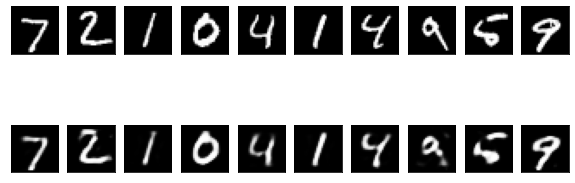

In [13]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(x_test)
# transform data onto the first two principal components
X_pca = pca.transform(x_test)
print("Original shape: {}".format(str(x_test.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (10000, 784)
Reduced shape: (10000, 2)
